# Data Science with Python and Dask
## Chapter 2 - Introducing Dask

### Section 2.1.1: Examining the Metadata of Dask Objects

In [1]:
# Change your working directory to where the data resides
import os
os.chdir('/Users/Abba/Documents/data-science-python-dask')

import kagglehub

# Download latest version
path = kagglehub.dataset_download("new-york-city/nyc-parking-tickets")

print("Path to dataset files:", path)

In [2]:
# Listing 2.1
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
from matplotlib import pyplot as plt

In [3]:
# dtypes set in iterative process, checking errors and adding as needed for metadata type mismatches.
df = dd.read_csv('nyc-parking-tickets/*2017.csv', dtype={'House Number': 'object','Time First Observed': 'object', 'Issuer Squad': 'object', 'Violation Post Code': 'object' } )
df

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Time First Observed,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Violation Legal Code,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
npartitions=32,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,int64,string,string,string,string,int64,string,string,string,int64,int64,int64,int64,float64,int64,int64,int64,string,string,string,string,string,string,string,string,string,int64,int64,string,string,string,string,string,string,float64,int64,string,int64,string,string,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [4]:
# Listing 2.2
missing_values = df.isnull().sum()
missing_values

Dask Series Structure:
npartitions=1
Date First Observed    int64
Violation Time           ...
Dask Name: sum, 5 expressions
Expr=(~ NotNull(frame=ArrowStringConversion(frame=FromMapProjectable(6317212)))).sum()

In [5]:
# Listing 2.3
missing_count = ((missing_values / df.index.size) * 100)
missing_count

Dask Series Structure:
npartitions=1
Date First Observed    float64
Violation Time             ...
Dask Name: mul, 9 expressions
Expr=(~ NotNull(frame=ArrowStringConversion(frame=FromMapProjectable(6317212)))).sum() / Index(frame=ArrowStringConversion(frame=FromMapProjectable(6317212))).size() * 100

### Section 2.1.2: Running Computations with the Compute Method

In [6]:
# Listing 2.4
with ProgressBar():
    missing_count_pct = missing_count.compute()
missing_count_pct

[########################################] | 100% Completed | 74.35 s


Summons Number                         0.000000
Plate ID                               0.006739
Registration State                     0.000000
Plate Type                             0.000000
Issue Date                             0.000000
Violation Code                         0.000000
Vehicle Body Type                      0.395361
Vehicle Make                           0.676199
Issuing Agency                         0.000000
Street Code1                           0.000000
Street Code2                           0.000000
Street Code3                           0.000000
Vehicle Expiration Date                0.000000
Violation Location                    19.183510
Violation Precinct                     0.000000
Issuer Precinct                        0.000000
Issuer Code                            0.000000
Issuer Command                        19.093212
Issuer Squad                          19.101506
Violation Time                         0.000583
Time First Observed                   92

In [7]:
# Listing 2.5
columns_to_drop = missing_count_pct[missing_count_pct > 60].index.tolist()

with ProgressBar():
    df_dropped = df.drop(columns_to_drop, axis=1).persist()

[########################################] | 100% Completed | 73.18 s


### Section 2.2.1: Visualizing a Simple DAG using Dask Delayed Objects

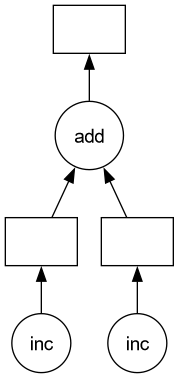

In [8]:
# Listing 2.6
import dask.delayed as delayed
from dask.diagnostics import ProgressBar

def inc(i):
    return i + 1

def add(x, y):
    return x + y

x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)

z.visualize()

### Section 2.2.2: Visualizing More Complex DAGs with Loops and Collections

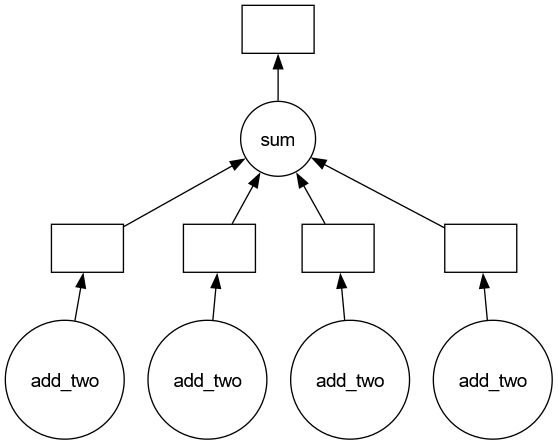

In [9]:
# Listing 2.7
def add_two(x):
    return x + 2

def sum_two_numbers(x,y):
    return x + y

def multiply_four(x):
    return x * 4

data = [1, 5, 8, 10]

step1 = [delayed(add_two)(i) for i in data]
total = delayed(sum)(step1)
total.visualize()

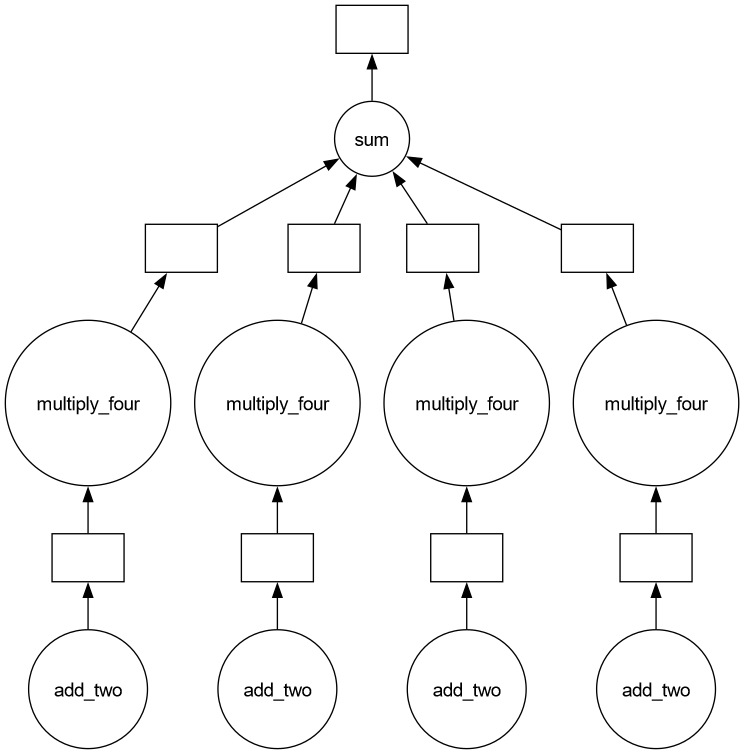

In [10]:
# Listing 2.8
def add_two(x):
    return x + 2

def sum_two_numbers(x,y):
    return x + y

def multiply_four(x):
    return x * 4

data = [1, 5, 8, 10]

step1 = [delayed(add_two)(i) for i in data]
step2 = [delayed(multiply_four)(j) for j in step1]
total = delayed(sum)(step2)
total.visualize()

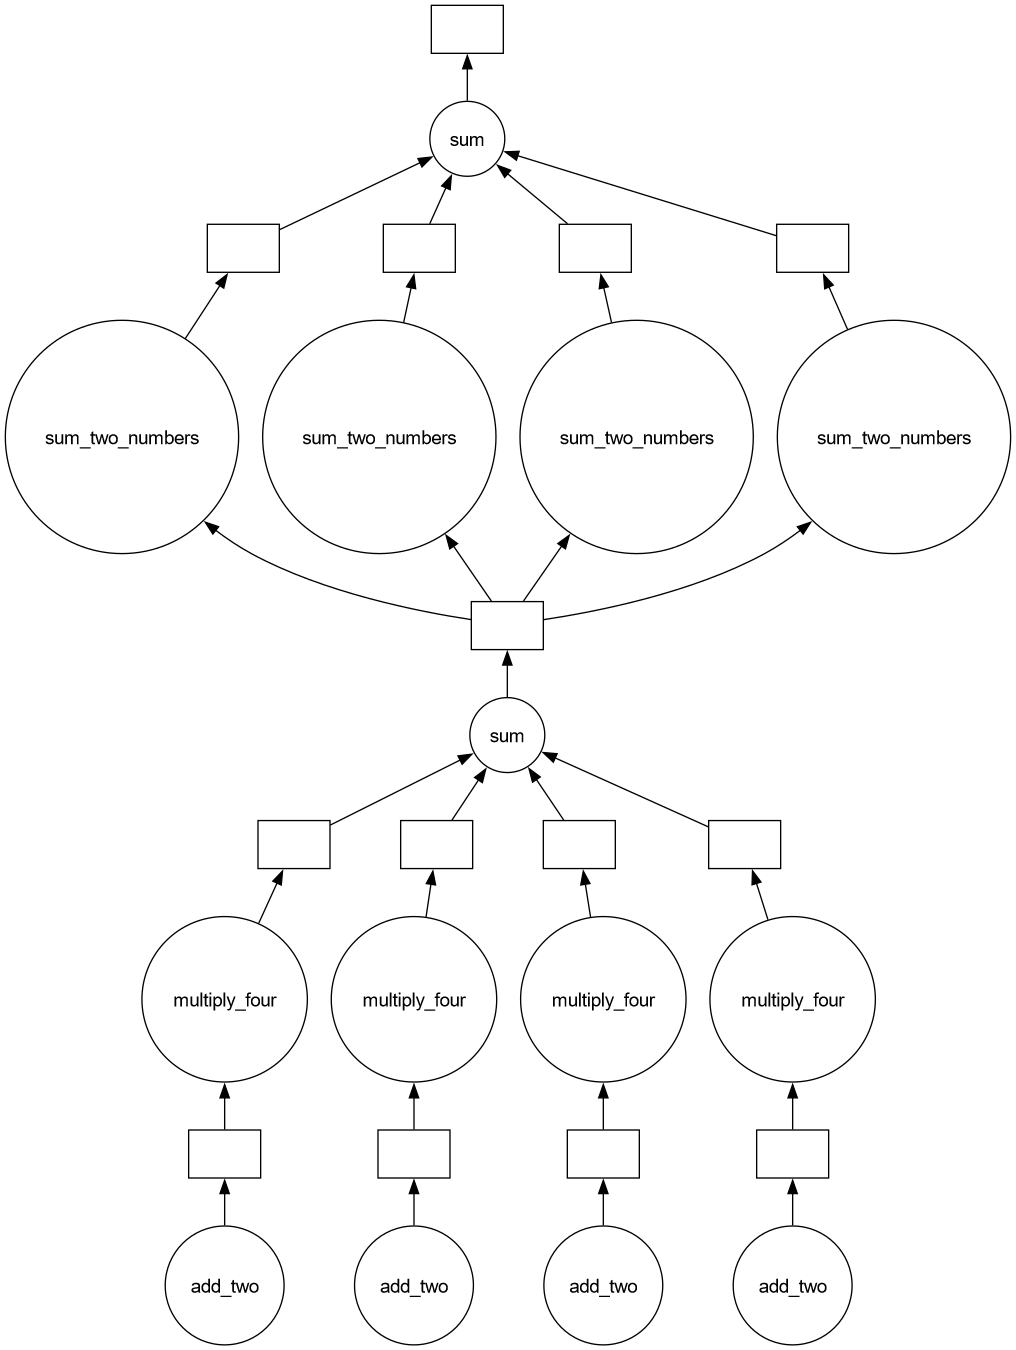

In [11]:
# Listing 2.9
data2 = [delayed(sum_two_numbers)(k, total) for k in data]
total2 = delayed(sum)(data2)
total2.visualize()

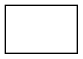

In [12]:
# Listing 2.10
total_persisted = total.persist()
total_persisted.visualize()

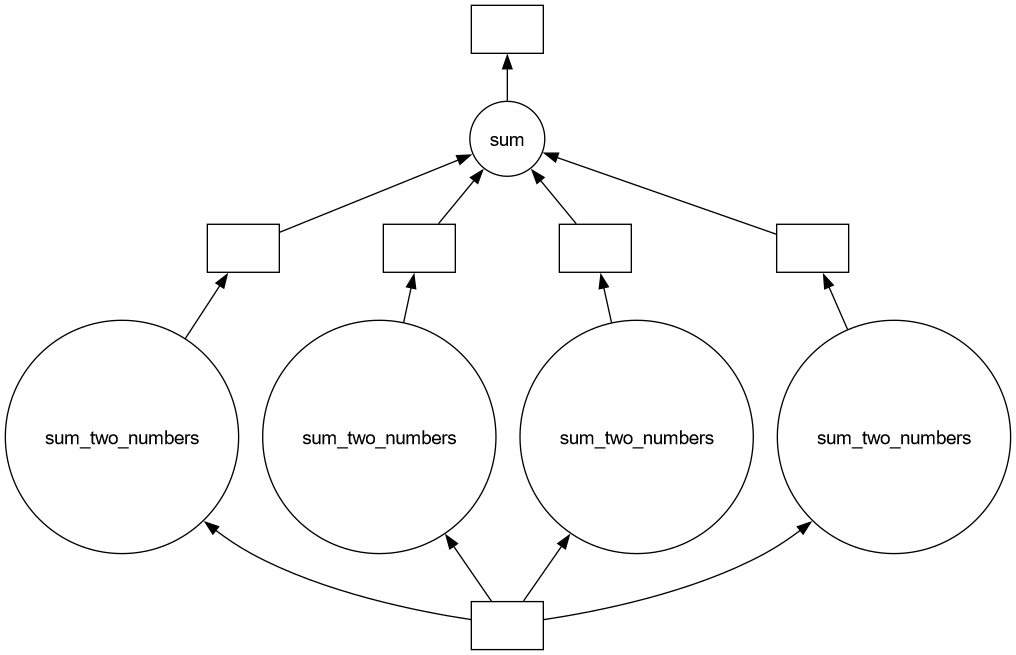

In [13]:
# Listing 2.11
data2 = [delayed(sum_two_numbers)(l, total_persisted) for l in data]
total2 = delayed(sum)(data2)
total2.visualize()

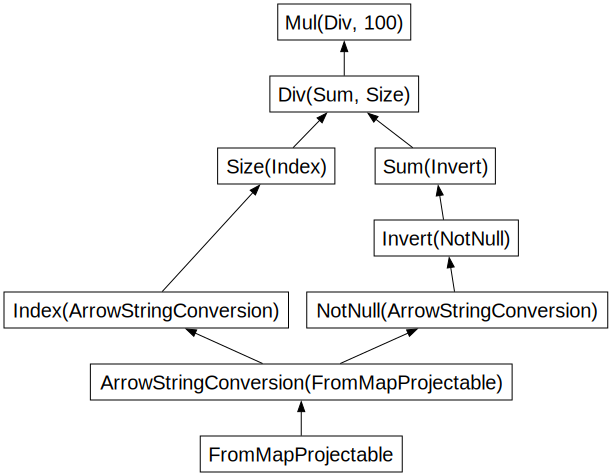

In [14]:
# Listing 2.12
missing_count.visualize()